#### Testing of the implementation of InceptionResNetV2 for classification of skin lesions using the MNIST-HAM10000 Dataset.
- Date : January 25th 2024
- Author : Aarya Bhave
- Project : Skin_Cancer_Diagnosis
  
This code carries out testing on the InceptionResNetV2 Model for classification of seven types of skin lesions.  
Before running this file locally, you must have Tensorflow-GPU installed with a dedicated GPU.
 

In [26]:
from time import time
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

##### Load and test directory based model.

In [2]:
test_model = tf.keras.models.load_model("InceptionResNetV2_Loadable")

2024-01-30 21:27:58.012195: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 21:27:58.037707: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 21:27:58.037875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

##### Set up generators and loaders

In [3]:
#Setup generator.
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input,
                            #    rotation_range=30,
                            #    width_shift_range=0.1,
                            #    height_shift_range=0.1,
                            #    shear_range=0.1,
                            #    zoom_range=0.2,
                            #    horizontal_flip=True,
                            #    fill_mode='nearest',
                            #    # rescale=1/255,
                               validation_split=0.15)

data_dir = 'data/reorganized'
batch_size = 32
target_size = (224,224)

#Setup loaders.
test_image_gen = image_gen.flow_from_directory(data_dir, 
                                          target_size=target_size, 
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=True,
                                          subset="validation")

print(test_image_gen.class_indices)

Found 1499 images belonging to 7 classes.
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


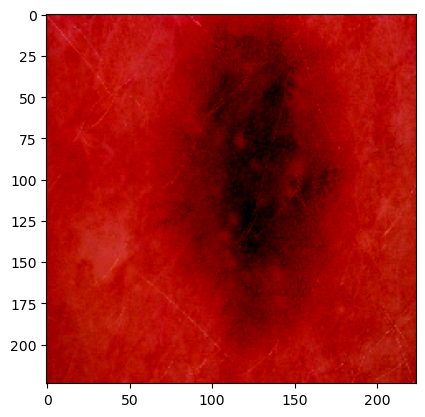

[0. 0. 0. 0. 0. 1. 0.]
(224, 224, 3)
1/1 [==============================] - 0s 43ms/step
tf.Tensor([[0. 0. 0. 0. 0. 1. 0.]], shape=(1, 7), dtype=float32)


In [25]:
imag_data = test_image_gen.next()
img = imag_data[0][0]
label = imag_data[1][0] 
plt.imshow(img)
plt.show()
print(label)
print(img.shape)
print(tf.round(test_model.predict(img.reshape(1,224, 224, 3))))

##### Load and test h5 model

In [27]:
h5_model = tf.keras.models.load_model('Prototype_Models/InceptionResNetV2_H5.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


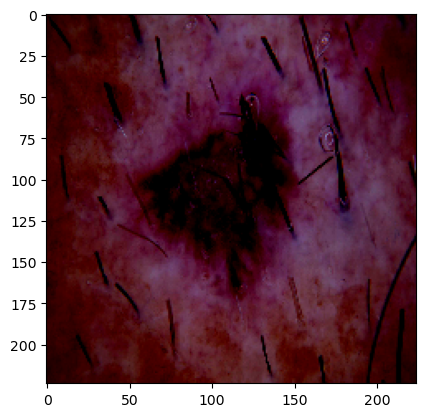

[1. 0. 0. 0. 0. 0. 0.]
(224, 224, 3)
1/1 [==============================] - 0s 23ms/step
tf.Tensor([[0. 0. 1. 0. 0. 0. 0.]], shape=(1, 7), dtype=float32)
Total Time Taken =  0.055823326110839844


In [50]:
imag_data = test_image_gen.next()
img = imag_data[0][0]
label = imag_data[1][0] 
plt.imshow(img)
plt.show()
print(label)
print(img.shape)
time_before = time()
print(tf.round(h5_model.predict(img.reshape(1,224, 224, 3))))
time_after = time()
print("Total Time Taken = ", time_after-time_before)

##### Load and test tflite model

In [51]:
tflite_model_path = 'Prototype_Models/InceptionResNetV2_Lite.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [53]:
print(input_details)
print(output_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 829, 'shape': array([1, 7], dtype=int32), 'shape_signature': array([-1,  7], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


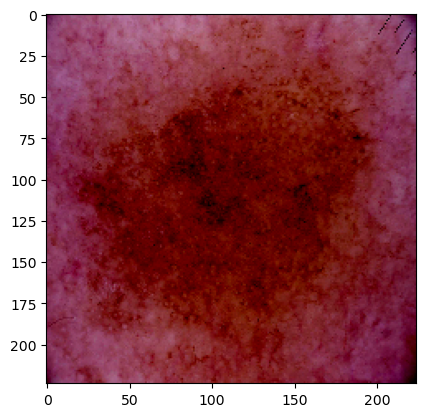

[0. 0. 1. 0. 0. 0. 0.]
(224, 224, 3)
(1, 224, 224, 3)
Total Time Taken =  0.13637852668762207
Prediction is:  tf.Tensor([[0. 0. 1. 0. 0. 0. 0.]], shape=(1, 7), dtype=float32)


In [87]:
imag_data = test_image_gen.next()
img = imag_data[0][0]
label = imag_data[1][0] 
plt.imshow(img)
plt.show()
print(label)
print(img.shape)
img = img.reshape(1, 224, 224, 3)
print(img.shape)

interpreter.set_tensor(input_details[0]['index'], img)
time_before = time()
interpreter.invoke()
time_after = time()
print("Total Time Taken = ", time_after-time_before)

output_data_tflite = interpreter.get_tensor(output_details[0]['index'])
print("Prediction is: ", tf.round(output_data_tflite))